In [9]:
import matplotlib.pyplot as plt
import numpy as np
def add_labels(x_list, y_list, labels):
    for x, y, label in zip(x_list,y_list, labels):
        plt.text(x+0.25,y+0.25,label)
from sklearn.decomposition import PCA
import pandas as pd
notes = pd.read_csv('./data/notes.txt', sep='\s+')
cls = PCA(n_components=4)
pcs = cls.fit_transform(notes)
cls.components_

array([[ 0.51453535,  0.50698853,  0.49235486,  0.48462835,  0.03062778],
       [-0.56694916, -0.37199576,  0.65035356,  0.32323853,  0.11289333],
       [ 0.05132308,  0.01445296, -0.10806565, -0.02254331,  0.99245689],
       [-0.28874852,  0.55305647,  0.39373536, -0.67419539,  0.03443659]])

In [ ]:
plt.rcParams['"figure.figsize'] = (5,3)
plt.bar(['AXE 1','AXE2','Axe3','Axe4'],cls.explained_variance_)

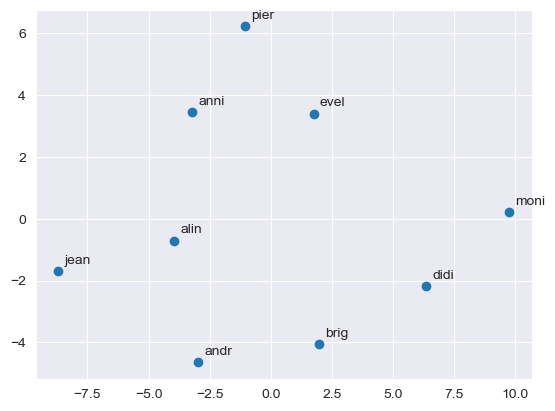

In [6]:
plt.scatter(pcs[:,0],pcs[:,1])
add_labels(pcs[:,0],pcs[:,1],notes.index)

In [32]:
df = pd.read_csv('./data/notes.txt',sep='\s+')
notes = df.to_numpy()
n, p =notes.shape
M=np.eye(p)
Dp=1/n * np.eye(n)

In [33]:
notes_mean = notes.mean(axis=0)
notes = notes - notes_mean

In [34]:
import scipy.linalg as linalg
# V= notes.T @Dp @notes
V= 1/n * notes.T @notes
valp, vecp = linalg.eigh(V @ M)
valp = valp[::-1]
vecp=vecp[:,::-1]

<BarContainer object of 5 artists>

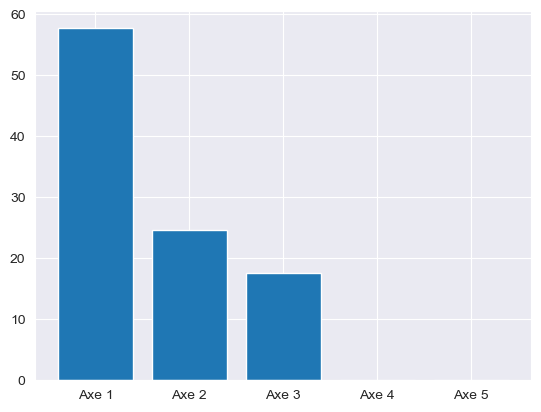

In [35]:
percents = 100 * valp / sum(valp)
plt.bar(['Axe 1','Axe 2','Axe 3','Axe 4','Axe 5'],percents)

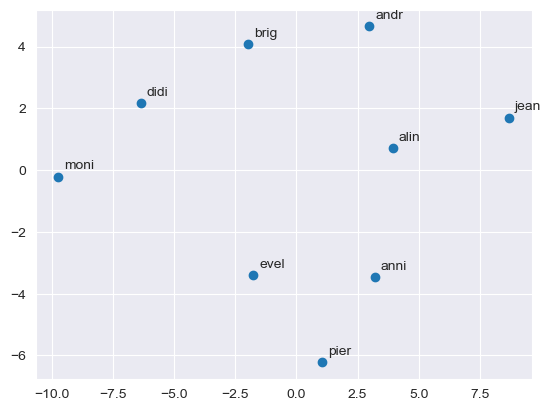

In [36]:
U = vecp
C = notes @ M @ U
plt.scatter(C[:,0],C[:,1])
add_labels(C[:,0],C[:,1],df.index)